In [103]:
import numpy as np
from keras.preprocessing import text, sequence
import json
import gensim
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from keras import optimizers

In [2]:
max_features = 5000
maxlen = 50
embed_size = 300

In [39]:
def getSentences(file_name, hasLabels = True) :
    sentences = []
    aspects = []
    with open(file_name) as f :
        reviews = json.load(f)['Reviews']['Review']
        for d in reviews:
            sen = d["sentences"]['sentence']
            if isinstance(sen, list) :
                for s in sen:
                    sentences.append(s['text'])
                    if hasLabels:
                        aspect_terms = []
                        if "Opinions" in s :
                                opinions = s['Opinions']['Opinion']
                                if isinstance(opinions, list) :
                                    for o in opinions :
                                        aspect_terms.append([x.lower() for x in o['@target'].strip().split(" ")])
                                else :
                                    aspect_terms.append([x.lower() for x in opinions['@target'].strip().split(" ")])
                        aspects.append(aspect_terms)
            else :
                sentences.append(sen['text'])
                if hasLabels:
                        aspect_terms = []
                        if "Opinions" in sen :
                                opinions = sen['Opinions']['Opinion']
                                if isinstance(opinions, list) :
                                    for o in opinions :
                                        aspect_terms.append([x.lower() for x in o['@target'].strip().split(" ")])
                                else :
                                    aspect_terms.append([x.lower() for x in opinions['@target'].strip().split(" ")])
                        aspects.append(aspect_terms)
    return sentences, aspects


train_sentences, train_aspects = getSentences('Data/ABSA-15_Restaurants_Train.json')
test_sentences, test_aspects = getSentences('Data/ABSA15_Restaurants_Test.json')

In [4]:
# train_sentences

In [40]:
tokenizer = text.Tokenizer(num_words=max_features,filters='.!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(train_sentences + test_sentences)

In [6]:
# EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz'

# embeddings_index = gensim.models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

# embeddings_index['dog'].shape

In [7]:
# word_index = tokenizer.word_index
# nb_words = max(max_features, len(word_index))
# embedding_matrix = np.zeros((nb_words, embed_size))
# without_embed = []
# n=0
# m = 0
# for word, i in word_index.items():
#     if i >= max_features: break
#     try:
#         embedding_vector = embeddings_index[word]
#         if embedding_vector is not None: 
#             embedding_matrix[i] = embedding_vector
#             m += 1
#     except:
#             n += 1
#             without_embed.append(word)
# #             print word 
            
# print "Words without embeddings %d" % n

# print "Words with embeddings %d" % m


In [8]:
# with open('embedding_matrix_300.pkl','wb') as f:
#     pickle.dump(embedding_matrix,f)

In [9]:
with open('embedding_matrix_300.pkl','rb') as f:
    embedding_matrix = pickle.load(f)

In [10]:
# embeddings_index['dog']

In [11]:
# trainX = tokenizer.texts_to_sequences(train_sentences)
# testX = tokenizer.texts_to_sequences(test_sentences)

# trainX = sequence.pad_sequences(trainX, maxlen=maxlen, padding="post")
# testX = sequence.pad_sequences(testX, maxlen=maxlen, padding="post")

In [12]:
# # plt.style.use("ggplot")
# plt.hist([len(s) for s in trainX], bins=50)
# plt.show()

In [109]:
def get_labels(X, aspects) :
    lenn = len(X)
    y = []
    symbol = 0
    for i in range(lenn):
        labels = []
        for j in X[i]:
            if j == 0 :
                symbol = 0
                labels.append(symbol)
            else:
                stop = False
                for w,k in tokenizer.word_index.items():
                    if k == j :
                        for a in aspects[i]:
                            if w in a :
                                if symbol == 0 or symbol == 1: symbol += 1
                                labels.append(symbol)
                                stop = True
                                break
                        if stop : break
                    if stop : break
                if not stop : 
                    symbol = 0
                    labels.append(symbol) 
        y.append(labels)
        print str(i) + '/' + str(lenn)
    return y


trainY = get_labels(trainX, train_aspects)
testY = get_labels(testX, test_aspects)

0/1315
1/1315
2/1315
3/1315
4/1315
5/1315
6/1315
7/1315
8/1315
9/1315
10/1315
11/1315
12/1315
13/1315
14/1315
15/1315
16/1315
17/1315
18/1315
19/1315
20/1315
21/1315
22/1315
23/1315
24/1315
25/1315
26/1315
27/1315
28/1315
29/1315
30/1315
31/1315
32/1315
33/1315
34/1315
35/1315
36/1315
37/1315
38/1315
39/1315
40/1315
41/1315
42/1315
43/1315
44/1315
45/1315
46/1315
47/1315
48/1315
49/1315
50/1315
51/1315
52/1315
53/1315
54/1315
55/1315
56/1315
57/1315
58/1315
59/1315
60/1315
61/1315
62/1315
63/1315
64/1315
65/1315
66/1315
67/1315
68/1315
69/1315
70/1315
71/1315
72/1315
73/1315
74/1315
75/1315
76/1315
77/1315
78/1315
79/1315
80/1315
81/1315
82/1315
83/1315
84/1315
85/1315
86/1315
87/1315
88/1315
89/1315
90/1315
91/1315
92/1315
93/1315
94/1315
95/1315
96/1315
97/1315
98/1315
99/1315
100/1315
101/1315
102/1315
103/1315
104/1315
105/1315
106/1315
107/1315
108/1315
109/1315
110/1315
111/1315
112/1315
113/1315
114/1315
115/1315
116/1315
117/1315
118/1315
119/1315
120/1315
121/1315
122/1315
123

925/1315
926/1315
927/1315
928/1315
929/1315
930/1315
931/1315
932/1315
933/1315
934/1315
935/1315
936/1315
937/1315
938/1315
939/1315
940/1315
941/1315
942/1315
943/1315
944/1315
945/1315
946/1315
947/1315
948/1315
949/1315
950/1315
951/1315
952/1315
953/1315
954/1315
955/1315
956/1315
957/1315
958/1315
959/1315
960/1315
961/1315
962/1315
963/1315
964/1315
965/1315
966/1315
967/1315
968/1315
969/1315
970/1315
971/1315
972/1315
973/1315
974/1315
975/1315
976/1315
977/1315
978/1315
979/1315
980/1315
981/1315
982/1315
983/1315
984/1315
985/1315
986/1315
987/1315
988/1315
989/1315
990/1315
991/1315
992/1315
993/1315
994/1315
995/1315
996/1315
997/1315
998/1315
999/1315
1000/1315
1001/1315
1002/1315
1003/1315
1004/1315
1005/1315
1006/1315
1007/1315
1008/1315
1009/1315
1010/1315
1011/1315
1012/1315
1013/1315
1014/1315
1015/1315
1016/1315
1017/1315
1018/1315
1019/1315
1020/1315
1021/1315
1022/1315
1023/1315
1024/1315
1025/1315
1026/1315
1027/1315
1028/1315
1029/1315
1030/1315
1031/1315
1032/

561/685
562/685
563/685
564/685
565/685
566/685
567/685
568/685
569/685
570/685
571/685
572/685
573/685
574/685
575/685
576/685
577/685
578/685
579/685
580/685
581/685
582/685
583/685
584/685
585/685
586/685
587/685
588/685
589/685
590/685
591/685
592/685
593/685
594/685
595/685
596/685
597/685
598/685
599/685
600/685
601/685
602/685
603/685
604/685
605/685
606/685
607/685
608/685
609/685
610/685
611/685
612/685
613/685
614/685
615/685
616/685
617/685
618/685
619/685
620/685
621/685
622/685
623/685
624/685
625/685
626/685
627/685
628/685
629/685
630/685
631/685
632/685
633/685
634/685
635/685
636/685
637/685
638/685
639/685
640/685
641/685
642/685
643/685
644/685
645/685
646/685
647/685
648/685
649/685
650/685
651/685
652/685
653/685
654/685
655/685
656/685
657/685
658/685
659/685
660/685
661/685
662/685
663/685
664/685
665/685
666/685
667/685
668/685
669/685
670/685
671/685
672/685
673/685
674/685
675/685
676/685
677/685
678/685
679/685
680/685
681/685
682/685
683/685
684/685


In [124]:
a = 69
print train_sentences[a]
print trainX[a]
print train_aspects[a]
print trainY[a]

The Prix Fixe menu is worth every penny and you get more than enough (both in quantity AND quality).
[   1  862  863   85    5   96  161 1663    2   16   63   61   81  278
  199   11 1120    2  260    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
[[u'prix', u'fixe', u'menu'], [u'prix', u'fixe', u'menu'], [u'prix', u'fixe', u'menu']]
[0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [125]:
with open('trainX.pkl', 'wb') as f:
    pickle.dump(trainX, f)
with open('trainY.pkl', 'wb') as f:
    pickle.dump(trainY, f)
with open('testX.pkl', 'wb') as f:
    pickle.dump(testX, f)
with open('testY.pkl', 'wb') as f:
    pickle.dump(testY, f)

In [126]:
with open('trainX.pkl', 'rb') as f:
    trainX = pickle.load(f)
with open('trainY.pkl', 'rb') as f:
    trainY = np.array(pd.DataFrame(pickle.load(f)))
with open('testX.pkl', 'rb') as f:
    testX = pickle.load(f)
with open('testY.pkl', 'rb') as f:
    testY = np.array(pd.DataFrame(pickle.load(f)))

In [16]:
# k = 8 #8
# print train_sentences[k]
# print trainX[k]

# # for c in trainX[0]:
# #     tokenizer

# def get_words(seq):
#     words = []
#     for ind in seq:
#         if ind == 0 : break
#         for w,i in tokenizer.word_index.items():
#             if i == ind :
#                 words.append(w)
#                 break
#     return words

# print get_words(trainX[k])
# print train_aspects[k]
# print trainY[k]

In [17]:
from keras import backend as K

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec+rec+K.epsilon()))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="sigmoid")`


Train on 1183 samples, validate on 132 samples
Epoch 1/50
1183/1183 [==============================] - 3s 3ms/step - loss: 0.2640 - acc: 0.9552 - f1: 0.1476 - precision: 25426880.9346 - recall: 0.1089 - val_loss: 0.1626 - val_acc: 0.9700 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
1183/1183 [==============================] - 1s 1ms/step - loss: 0.1157 - acc: 0.9740 - f1: 0.0514 - precision: 10549450.5495 - recall: 0.0257 - val_loss: 0.1356 - val_acc: 0.9700 - val_f1: 0.0220 - val_precision: 4848484.8485 - val_recall: 0.0110
Epoch 3/50
1183/1183 [==============================] - 1s 1ms/step - loss: 0.1025 - acc: 0.9738 - f1: 0.0963 - precision: 17032967.2399 - recall: 0.0486 - val_loss: 0.1133 - val_acc: 0.9697 - val_f1: 0.2944 - val_precision: 65757576.2424 - val_recall: 0.1481
Epoch 4/50
1183/1183 [==============================] - 1s 1ms/step - loss: 0.0931 - acc: 0.9727 - f1: 0.2809 - precision: 8377009.1019 - recall: 0.1679 - val_loss: 0.10

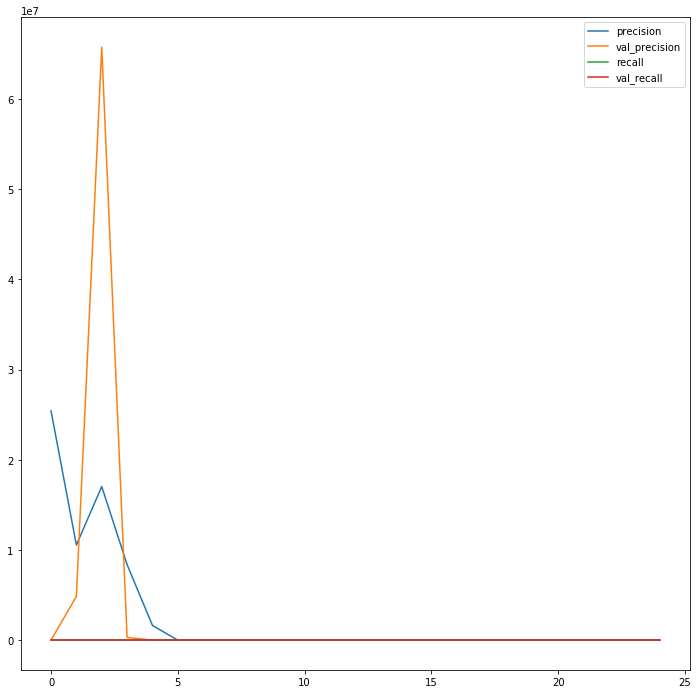

In [127]:
from keras.models import Model, Input, Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Flatten
from keras.callbacks import EarlyStopping
from keras_contrib.layers import CRF

earlyStopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')


model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embed_size, weights=[embedding_matrix], 
                    trainable = False, batch_input_shape=(None, maxlen)))
# model.add(Embedding(input_dim=max_features, output_dim=maxlen, input_length=maxlen))
model.add(Dropout(0.1))
model.add(LSTM(units=maxlen, return_sequences=True, recurrent_dropout=0.1))
model.add(Flatten())
# model.add(LSTM(units=maxlen, return_sequences=False, recurrent_dropout=0.1))
model.add(Dense(activation='sigmoid', output_dim=maxlen))


# sgd = optimizers.SGD(lr=0.0001, decay=1e-8, momentum=0.9, nesterov=True)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", f1, precision, recall])

history = model.fit(trainX, trainY, batch_size=32, epochs=50, validation_split=0.1, verbose=1, callbacks=[earlyStopper])

hist = pd.DataFrame(history.history)
plt.figure(figsize=(12,12))
plt.plot(hist['precision'], label='precision')
plt.plot(hist['val_precision'], label='val_precision')
plt.plot(hist['recall'], label='recall')
plt.plot(hist['val_recall'], label='val_recall')
plt.legend()
plt.show()

# hist

# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

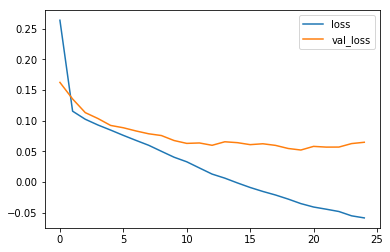

In [128]:
# plt.plot(hist["acc"] , label='acc')
# plt.plot(hist["val_acc"] , label='val_acc')

plt.plot(hist['loss'], label='loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [148]:
from sklearn.metrics import recall_score, precision_score, f1_score

threshold = 0.5

testY_pred = model.predict(testX)
# pred_y_te = np.round(pred_y_te)
testY_pred = np.array([ [0 if e < threshold else 1 for e in p] for p in testY_pred ])
testY_new = np.array([ [0 if e < threshold else 1 for e in p] for p in testY ])

# testY_pred

print('Precision : ' + str(precision_score(testY_new, testY_pred, average='micro')))
print('Recall : ' + str(recall_score(testY_new, testY_pred, average='micro')))
print('F1-score : ' + str(f1_score(testY_new, testY_pred, average='micro')))

Precision : 0.48175182481751827
Recall : 0.7333333333333333
F1-score : 0.5814977973568283


In [90]:
def processSentence(text):
    temp = tokenizer.texts_to_sequences([text])
    temp = sequence.pad_sequences(temp, maxlen=maxlen, padding="post")
    return temp[0]

def get_words(seq):
    words = []
    for ind in seq:
        if ind == 0 : 
            words.append('__')
        for w,i in tokenizer.word_index.items():
            if i == ind :
                words.append(w)
                break
    return words

sentence : The Cypriot restaurant has a lot going for it.
aspects : [[u'cypriot', u'restaurant']]


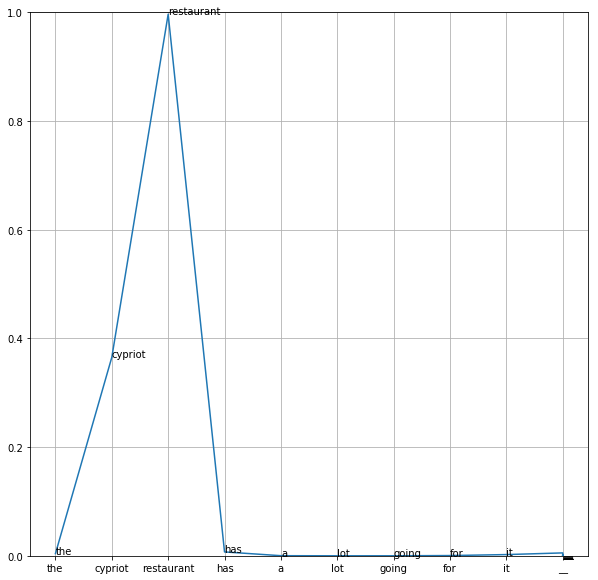

In [159]:
# ex = 'The food is very average...the crispy chicken is a bit too sweet, every thing they serve is too sweet here.'
i = 13 #49 55 59  interesting - 89 11
ex = test_sentences[i]
X_ex = processSentence(ex)

print("sentence : " + ex)
print("aspects : " + str(test_aspects[i]))
p = model.predict(np.array([X_ex]))

# i = 45  #45 54 5 65 110 32  # 111 out
# p = model.predict(np.array([X_te[i]]))
# arg_p = np.argmax(p, axis=-1)
# print(arg_p)

words_p = get_words(X_ex)


# print(train_sentences[len(X_tr) + i])
# print(long_sentences[len(X_tr) + i])


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_ylim([0,1])

plt.plot(words_p, p[0])
for xy in zip(words_p, p[0]):                                       
    ax.annotate('%s' % xy[0], xy=xy, textcoords='data')

plt.grid()
plt.show()
